TASK目标：

本次TASK具体要求如下：

（1）构建一个你自己的CNN模型用来对cifar10数据进行训练，将精度与案例中的精度对比，看看效果如何？

（2）对所有程序做详细注释，以确认你的理解正确；

（3）请详细计算并解释你所建立的CNN模型的参数个数。

In [1]:
from PIL import Image
from glob import glob
import numpy as np
from keras.utils import to_categorical 
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from keras.layers import Dense, Flatten,Input,Activation,Conv2D,MaxPooling2D,BatchNormalization
from keras import Model

In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, Sequential, layers,metrics

In [29]:
filename = 'F:\\大三（上）\\深度学习\\TASK3.2：Case Study：Cifar10数据训练\\cifar-10-batches-py'
def load_file(filename):
    with open(filename,'rb') as fo:
        data = pickle.load(fo,encoding='latin1')   
    return data

# 构建自己的模型 

In [13]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()   #导入数据

In [14]:
print('图像数据格式: ', X_train.shape)
print("训练集：%2.0f，测试集：%2.0f" %(X_train.shape[0], X_test.shape[0]))   # 转化成矩阵

图像数据格式:  (50000, 32, 32, 3)
训练集：50000，测试集：10000


In [15]:
X_train[0][:5, :, 1] # 图片矩阵中的第一条记录，显示R矩阵前5行

array([[ 62,  46,  48,  54,  73,  91, 107, 110, 117, 120, 103,  99, 115,
        112, 105,  97, 106, 106,  97, 113, 112, 105, 105, 108, 120, 131,
        136, 129, 130, 132, 125, 124],
       [ 20,   0,   8,  27,  51,  82,  89,  86,  87,  79,  70,  67,  70,
         74,  70,  72,  79,  71,  69,  89,  92,  85,  89,  82,  79,  89,
         91,  94,  96,  88,  83,  87],
       [ 24,   7,  27,  50,  72,  92,  93,  82,  77,  78,  79,  75,  73,
         92,  87,  92,  89,  85,  79,  85,  95,  96, 102,  90,  89,  89,
         92, 105,  94,  84,  84,  73],
       [ 25,  20,  54,  63,  70,  74,  72,  62,  68,  84,  90,  75,  77,
        105,  91,  84,  76,  76,  87,  81,  92,  99,  99,  93,  86,  91,
         90,  93,  90,  87,  85,  62],
       [ 32,  32,  65,  79,  77,  77,  78,  74,  72,  88,  89,  68,  71,
         83,  78,  68,  65,  74,  80,  80,  93, 106,  95,  98,  92,  84,
         79,  79,  67,  57,  47,  42]], dtype=uint8)

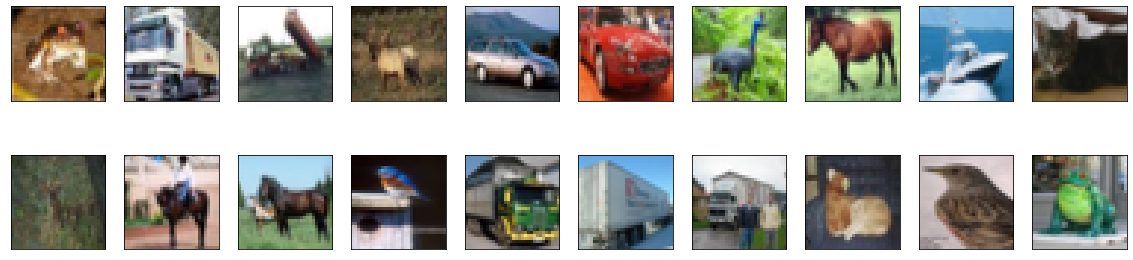

In [33]:
fig = plt.figure(figsize = (20, 5))     #构建画布
for i in range(20):                    #展示20张图片
    ax = fig.add_subplot(2, 10, i + 1, xticks = [], yticks = [])
    ax.imshow(X_train[i])
#y_train[:20].reshape(2, 10)

In [17]:
# 对因变量做处理
from keras.utils import np_utils

y_train = np_utils.to_categorical(y_train)      #将整型的类别标签转为onehot编码
y_test = np_utils.to_categorical(y_test)        #将整型的类别标签转为onehot编码

from keras.models import Sequential  
from keras.layers import *
from keras.backend import *

In [18]:
model = Sequential()
# 设定卷积层，共32个卷积核，感受野3*3，不补零，relu连接
model.add(Conv2D(32, (3, 3), padding = 'valid', input_shape = (32, 32, 3),
                 activation = 'relu'))
# 设定池化层为2*2取最大值
model.add(MaxPooling2D(pool_size = (2, 2)))
# 将数据展平为普通的一维格式
model.add(Flatten())
# 设定一个普通的全连接层
model.add(Dense(128, activation = 'relu'))
# 设定输出层
model.add(Dense(10, activation = 'softmax'))

# 卷积层连接权重数：((3 * 3) * 3 + 1) * 32
model.summary()   #输出模型各层的参数状况

model.compile(loss = 'categorical_crossentropy',           #损失函数
              optimizer = 'adam', metrics = ['accuracy'])  #优化器；准确率
model.fit(X_train, y_train, epochs = 10)     #调用模型求解
model.evaluate(X_test, y_test)           #输入数据和标签,输出损失和精确度.

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 7200)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               921728    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 923,914
Trainable params: 923,914
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1563/1563 [==============================] - 31s 20ms/step - loss: 2.9175 - accuracy: 0.3764
Epoch 2/10
1

[2.4223148822784424, 0.5156000256538391]

卷积层: 输⼊是3通道, 输出是32通道, 每输出⼀个通道需要消耗:共有32个输出通道, 所以消耗了896个参数.

最⼤池化层: 输出的还是32通道, 不需要任何参数.

flatten层: 将上⼀层的32通道矩阵拉直成⼀个⻓向量, 输出的是15x15x32=7200的向量, 不需要消耗任何参数.

输出层(dense层): 输⼊为7200维的向量, 分别输出为10维和2维向量. 消耗的参数为: 921728+1290=923018个参数.

合计: 共消耗了: 923914个参数

In [20]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import keras
from keras.callbacks import ModelCheckpoint

In [21]:
# 将原始数据转换为[0, 1]区间
X_train1 = X_train.astype('float32') / 255
X_test1 = X_test.astype('float32') / 255

# 类别向量转为多分类矩阵
y_train1 = keras.utils.to_categorical(y_train, 10)
y_test1 = keras.utils.to_categorical(y_test, 10)

y_train1[:10]

array([[[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],

       [[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]

In [22]:
# 建立基于keras的cnn模型
model = Sequential()

# 卷积==>卷积==>最大池化
model.add(Conv2D(32, (3, 3), padding = 'same',
                 input_shape = X_train1.shape[1:])) # 第一层需要指定数据格式
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))

# 卷积==>卷积==>最大池化
model.add(Conv2D(64, (3, 3), padding = 'same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))

# 将数据展平
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)       

卷积层1: 输⼊是32通道, 输出是32通道, 每输出⼀个通道需要消耗:896个参数.

卷积层2: 输⼊是30通道, 输出是32通道, 每输出⼀个通道需要消耗:9248个参数.

最⼤池化层1: 输出的还是32通道, 不需要任何参数.

dropout层: 输出的还是32通道, 不需要任何参数.

卷积层3: 输⼊是15通道, 输出是64通道, 每输出⼀个通道需要消耗:18496个参数.

卷积层4: 输⼊是13通道, 输出是64通道, 每输出⼀个通道需要消耗:36928个参数.

最⼤池化层2: 输出的还是64通道, 不需要任何参数.

flatten层: 将上⼀层的64通道矩阵拉直成⼀个⻓向量, 输出的是72304的向量, 不需要消耗任何参数.

dropout_2层: 输出的还是512通道, 不需要任何参数.

输出层(dense层): 输⼊为512维的向量, 输出为10维向量. 消耗的参数为:1180160+5130=1185290个参数.

合计: 共消耗了: 1,250,858个参数.

In [34]:
model.compile(loss = 'categorical_crossentropy',           #损失函数
              optimizer = 'adam', metrics = ['accuracy'])  #优化器；准确率
model.fit(X_train, y_train, epochs = 10)     #调用模型求解
model.evaluate(X_test, y_test)     

Epoch 1/10
1563/1563 [==============================] - 176s 113ms/step - loss: 2.0907 - accuracy: 0.3203
Epoch 2/10
1563/1563 [==============================] - 178s 114ms/step - loss: 1.4255 - accuracy: 0.4894
Epoch 3/10
1563/1563 [==============================] - 182s 117ms/step - loss: 1.2653 - accuracy: 0.5544
Epoch 4/10
1563/1563 [==============================] - 173s 111ms/step - loss: 1.1743 - accuracy: 0.5897
Epoch 5/10
1563/1563 [==============================] - 178s 114ms/step - loss: 1.1142 - accuracy: 0.6115
Epoch 6/10
1563/1563 [==============================] - 178s 114ms/step - loss: 1.0819 - accuracy: 0.6214
Epoch 7/10
1563/1563 [==============================] - 181s 116ms/step - loss: 1.0379 - accuracy: 0.6377
Epoch 8/10
1563/1563 [==============================] - 177s 113ms/step - loss: 1.0039 - accuracy: 0.6495
Epoch 9/10
1563/1563 [==============================] - 175s 112ms/step - loss: 0.9800 - accuracy: 0.6594
Epoch 10/10
313/313 [=========================

[0.86653733253479, 0.7002000212669373]

# 案例模型

In [ ]:
images = glob("cifar10/*")   # 导入数据
N=len(images)                #定义图片长度
imsize=32                    #设置随机种子

In [3]:
Y=[]
X=np.zeros([N,imsize,imsize,3])        # 构建以0填充的矩阵
for i in range(N):
    Im=Image.open(images[i])
    Im=np.array(Im)/255
    X[i]=Im
    cat=images[i].split("_")[0].split('/')[1]
    Y.append(cat)                    # 图像标准化

In [4]:
unique=list(set(Y))
DICT={}
for i in range(len(unique)): DICT[unique[i]]=i
YY=np.zeros(N)
for i in range(N):
    YY[i]=DICT[Y[i]]                 #数据标准化

In [5]:
DICT      # 查看数据类别

{'horse': 0,
 'truck': 1,
 'dog': 2,
 'bird': 3,
 'frog': 4,
 'airplane': 5,
 'deer': 6,
 'automobile': 7,
 'ship': 8,
 'cat': 9}

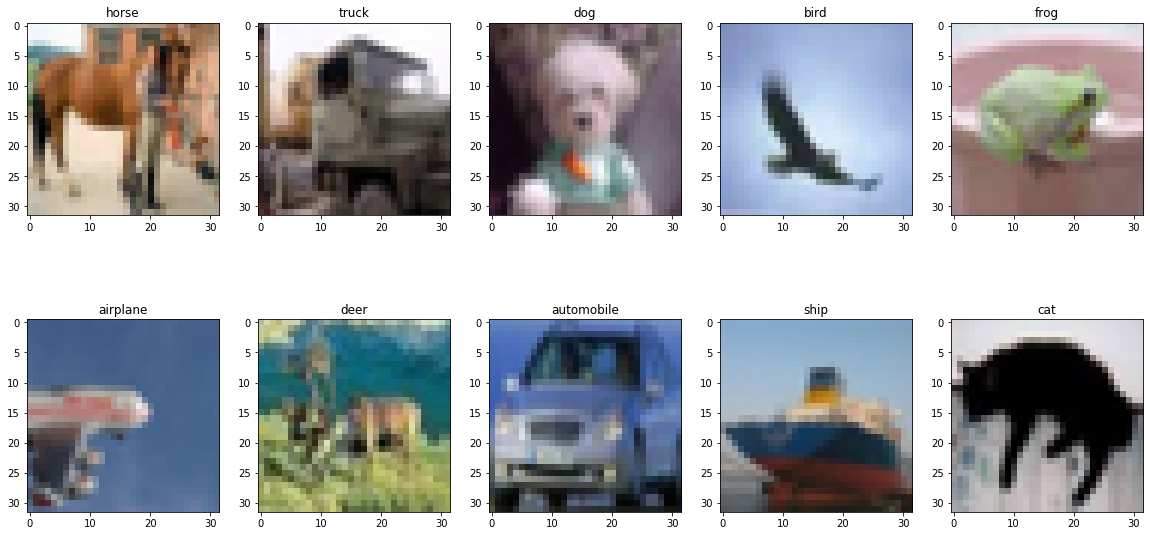

In [6]:
fig,ax=plt.subplots(2,5)             # 构建画布
fig.set_figwidth(20)
fig.set_figheight(10)
ax=ax.flatten()
for i in range(len(ax)):
    Im=X[YY==i][0]
    ax[i].imshow(Im)
    ax[i].set_title(unique[i])        # 输出标准化格式图片数据

In [7]:
Y=to_categorical(YY)                       # 类别向量转为多分类矩阵
X0,X1,Y0,Y1=train_test_split(X,Y,test_size=0.5,random_state=1)   # 拆分数据集

In [35]:
input_size=[imsize,imsize,3]          # 设置空矩阵
input_layer=Input(input_size)        # 输出
x=input_layer
x=Conv2D(100,[2,2],padding = "same", activation = 'relu')(x) 
x = MaxPooling2D(pool_size = [2,2])(x) 
x=Conv2D(100,[2,2],padding = "same", activation = 'relu')(x) 
x = MaxPooling2D(pool_size = [2,2])(x) 
x=Conv2D(100,[2,2],padding = "same", activation = 'relu')(x) 
x = MaxPooling2D(pool_size = [2,2])(x) 

x=Flatten()(x)
x=Dense(10,activation='softmax')(x)
output_layer=x

model=Model(input_layer,output_layer)  # 建立模型
model.summary()                        # 输出模型各层的参数状况

Model: "model_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_14 (InputLayer)        (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 32, 32, 100)       1300      
_________________________________________________________________
max_pooling2d_44 (MaxPooling (None, 16, 16, 100)       0         
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 16, 16, 100)       40100     
_________________________________________________________________
max_pooling2d_45 (MaxPooling (None, 8, 8, 100)         0         
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 8, 8, 100)         40100     
_________________________________________________________________
max_pooling2d_46 (MaxPooling (None, 4, 4, 100)         0  

输⼊层: 输⼊的是3通道的图⽚, 不消耗任何参数.

卷积层_44: 输⼊是3通道, 输出是100通道, 每输出⼀个通道需要消耗: 1300个参数.

最⼤池化层_44: 输出的还是100通道, 不需要任何参数.

卷积层_45: 输⼊是3通道, 输出是100通道, 每输出⼀个通道需要消耗: 40100个参数.

最⼤池化层_45: 输出的还是100通道, 不需要任何参数.

卷积层_46: 输⼊是3通道, 输出是100通道, 每输出⼀个通道需要消耗: 40100个参数.

最⼤池化层_46: 输出的还是100通道, 不需要任何参数.

flatten层: 将上⼀层的100通道矩阵拉直成⼀个⻓向量, 输出的是1600的向量, 不需要消耗任何参数.

输出层(dense层): 输⼊为100维的向量, 输出为10维向量. 消耗的参数为:16010个参数.

合计: 共消耗了:97,510个参数

In [38]:
from keras.optimizers import Adam
model.compile(optimizer = Adam(0.00001),loss = 'categorical_crossentropy',metrics = ['accuracy'])   #输出模型各项值
model.fit(X0,Y0,validation_data=(X1,Y1),batch_size=100,epochs=10)   # 调用模型求解

Train on 30000 samples, validate on 30000 samples
Epoch 1/10
30000/30000 [==============================] - 10s 318us/step - loss: 0.6944 - accuracy: 0.7633 - val_loss: 0.8643 - val_accuracy: 0.7041
Epoch 2/10
30000/30000 [==============================] - 9s 311us/step - loss: 0.6931 - accuracy: 0.7634 - val_loss: 0.8641 - val_accuracy: 0.7024
Epoch 3/10
30000/30000 [==============================] - 9s 312us/step - loss: 0.6924 - accuracy: 0.7643 - val_loss: 0.8639 - val_accuracy: 0.7028
Epoch 4/10
30000/30000 [==============================] - 9s 312us/step - loss: 0.6917 - accuracy: 0.7646 - val_loss: 0.8638 - val_accuracy: 0.7029
Epoch 5/10
30000/30000 [==============================] - 10s 327us/step - loss: 0.6911 - accuracy: 0.7646 - val_loss: 0.8633 - val_accuracy: 0.7028
Epoch 6/10
30000/30000 [==============================] - 9s 315us/step - loss: 0.6903 - accuracy: 0.7640 - val_loss: 0.8638 - val_accuracy: 0.7027
Epoch 7/10
30000/30000 [==============================] - 10

通过将自己建立的模型和案例模型进行对比，观察准确度，还是案例模型更胜一筹。